# TPC2 - Cadeias de Markov

*  Não deve escrever o seu nome nem nenhum código identificador em nenhum
sítio.
* Deve entregar ESTE Notebook de Jupyter.
* O trabalho é individual. Podem e devem haver discussões com colegas
mas o resultado entregue é individual.
* Não deve acrescentar ou apagar nenhuma célula.
* Todas as explicações devem ser claras e concisas.
* É preferível fazer menos e fazer bem que muito e mal.
* A não verificação de alguma destas regras leva ao anulamento e exclusão
da prova.

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy import linalg
%matplotlib inline

## Pergunta 1
***Partícula num potencial:***
Considere uma partícula que se move
num potencial de energia livre dependente da posição dado por
\begin{equation}
V_{\beta}(x)=x^{4}-2(\beta-1)x^{2}
\end{equation}
supondo que a partícula está em contacto térmico com um reservatório
de calor caracterizado por $\beta$ (inverso da temperatura) e a distribuição
de probabilidade da partícula estar numa dada posição é dada por
\begin{equation}
\rho_{\beta}(x)=\frac{e^{-\beta V_{\beta}(x)}}{Z(\beta)}
\end{equation}
onde $Z(\beta)$ é a função de partição do sistema.

1. Considere o passeio aleatório especial: A variável $x$ é discreta
e toma valores $x_{n}=0.04n$ com $n\in\mathbb{Z}$. Em cada tempo
o caminhante decide se tenta saltar para a direita ($\Delta x=0.04$)
ou para esquerda ($\Delta x=-0.04$) com probabilidade $1/2$ e aceita
a proposta com
\begin{equation}
p_{A}(x(t-1)\to x(t-1)+\Delta x)=\min\left(1,e^{-\beta\left(V_{\beta}(x(t-1)+\Delta x)-V_{\beta}(x(t-1))\right)}\right)
\end{equation}
Se aceitou a sua variável $x$ altera-se para $x+\Delta x$, caso
contrário, fica no mesmo valor de $x$.

$\qquad$a) Escreva uma função que implementa este algoritmo durante um tempo $t$ partindo de uma posição inicial (devolve o valor de $x$ ao fim desse tempo).

Responda Aqui

In [ ]:
def energy(x, beta):
  return x**4 - 2 * (beta - 1) * x**2

# Determina probabilidade de um movimento ser aceite
def acceptance_probability(x_prev, x_proposed, beta):
  delta_energy = energy(x_proposed, beta) - energy(x_prev, beta)
  return min(1, np.exp(-beta * delta_energy))

# Passeio aleatorio
def random_walk_special(beta, initial_position, total_time):
  positions = np.zeros(total_time)
  positions[0] = initial_position
  for t in range(1, total_time):
    current_position = positions[t-1]

    # Propor um movimento para a esquerda ou direita
    delta_x = 0.04 if np.random.rand() < 0.5 else -0.04
    proposed_position = current_position + delta_x

    # aceitar usando a acceptance_probability
    if np.random.rand() < acceptance_probability(current_position, proposed_position, beta):
      positions[t]=proposed_position
    else:
      positions[t] = positions[t-1]
  return positions

$\qquad$ b) Escreva uma matriz de Markov que representa este algoritmo limitando a variável de posição ao intervalo $x\in[-2,2]$ - Sempre que uma proposta tentar sair do intervalo recusa.

Responda Aqui

In [ ]:
def transition_matrix(beta, delta_x=0.04):
    # Define os estados possíveis no intervalo [-2, 2]
  states = np.arange(-2, 2.04, delta_x)
  num_states = len(states)

    # Inicializa a matriz com zeros
  matrix = np.zeros((num_states, num_states))

    # Preenche a matriz com as probabilidades adequadas
  for i, x in enumerate(states):
    for j, x_prime in enumerate(states):

      if i == j+1 or i == j-1:
              # Calcula a probabilidade de aceitação
        probability = acceptance_probability(x, x_prime, beta)/2 #1/2 de probabilidade de ir para a esquerda ou direita mas ainda tem a probabilidade de aceitação

                # Atualiza a matriz
        matrix[j, i] = probability
        matrix[i,i] = 1 - np.sum(matrix[:,i])

  return matrix

transition_matrix(1.4)

array([[ 0.5       ,  0.10490581,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       , -0.5       ,  0.11590238, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.5       , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.11590238,
         0.5       ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.11590238,
        -0.10490581,  0.5       ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.10490581,  0.5       ]])

2. Para $\beta=1.4$

$\qquad$ a) Escolha um valor de $x_{0}=0$ para o seu caminhante no instante inicial
$t=0$.

Responda Aqui

In [ ]:
# Responda Aqui

$\qquad$ b) Evolua a distribuição de probabilidades durante um tempo $t=1,4,16,64,256,512$ e represente a distribuição de probabilidade da simulação para esses instantes.

Responda Aqui

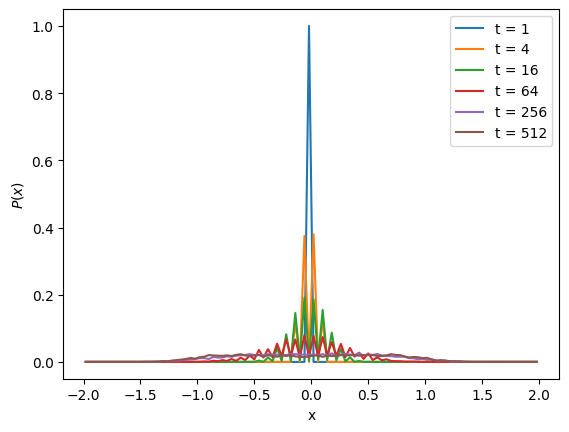

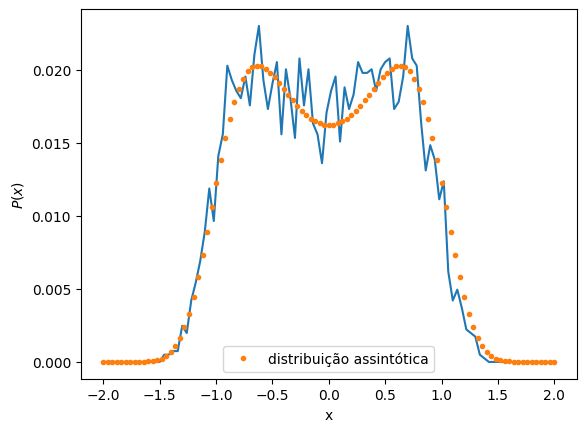

In [ ]:
# Inicialização
M = 4046
ts = np.array([1,4,16,64,256,512])
results = np.zeros((512,M))

# Itera o passeio M vezes
for i in range(M):
  results[:,i] = random_walk_special(1.4, 0, 512)

xs = np.arange(-2,2.04,0.04)

# Para cada t realiza um gráfico
for t in ts:
  hist,edges = np.histogram(results[t-1,:], bins=xs)
  plt.plot(edges[:-1] + 0.02, hist/np.sum(hist),label= 't = ' +str(t))
  plt.xlabel('x')
  plt.ylabel('$P(x)$')
  plt.legend()
plt.show()

# Distribuição assintotica e comparação
β=1.4
hist,edges = np.histogram(results[-1,:], bins=xs)
plt.plot(edges[:-1] + 0.02, hist/np.sum(hist))
plt.plot(xs, np.exp(-β*energy(xs, β))/np.sum(np.exp(-β*energy(xs, β))),'.',label='distribuição assintótica')
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend();

$\qquad$ c) Calcule a matriz de Markov que obteve em 1.b) e calcule para cada
um destes tempos calcule e represente,
\begin{equation}
\sum_{j}[\Omega^{t}]_{ij}P_{j}(0)
\end{equation}
Será que a matriz de Markov representa exactamente o algoritmo implementado?

Responda Aqui

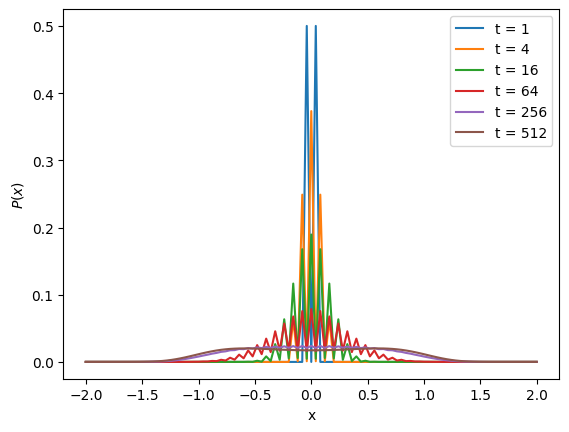

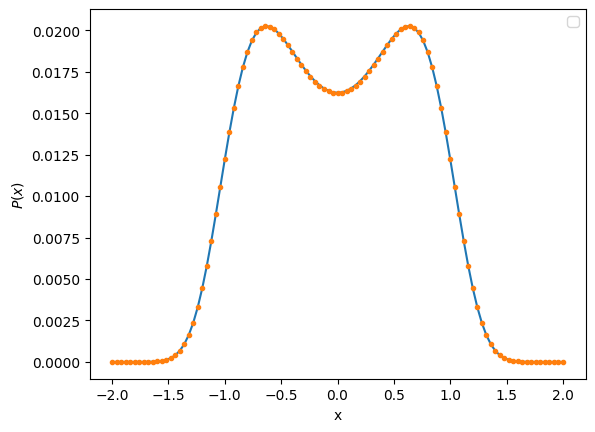

In [ ]:
def evolução_temporal(beta, delta_x,t):

  # Inicializa posição inicial com zeros
  n = 4/delta_x+1
  p_0 = np.zeros(int(n))
  p_0[int(n)//2] = 1

  # Determinação posição inicial
  matrix = transition_matrix(beta, delta_x)
  for i in range(t):
    p_0 = np.dot(matrix, p_0)

  return p_0

# Tempos que vão ser usados
ts = np.array([1,4,16,64,256,512])

# Gráficos
for t in ts:
  plt.plot(np.arange(-2,2.04,0.04), evolução_temporal(1.4,0.04,t),label= 't = ' +str(t))
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend()
plt.show()

# Distribuição assintotica e comparação
plt.plot(np.arange(-2,2.04,0.04),evolução_temporal(1.4,0.04,1024))

β = 1.4
xs = np.arange(-2,2.04,0.04)
plt.plot(xs, np.exp(-β*energy(xs, β))/np.sum(np.exp(-β*energy(xs, β))),'.')
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend();

$\qquad $d) Para a matrix de Markov calculada em 1.b) obtenha o espectro de valores
próprios e os vectores próprios à direita e à esquerda usando os módulos
de python ( por exemplo $scipy.linalg.eig$ ou o $mpmath.eig$ se precisar
de maior precisão). Garanta que os vectores estão normalizados e são
ortogonais:
\begin{equation}
\sum_{i}l_{i}^{(n)}r_{i}^{(m)}=\delta_{mn}
\end{equation}
onde $m$ e $n$ são índices dos valores próprios, $r_{i}^{(n)}$
é o vector próprio à direita e $l_{i}^{(n)}$ p vector próprio à esquerda
($i$ são os indices do espaço de eventos). Verifique que para cada
tempo considerado a distribuição de probabilidade é dada por
\begin{equation}
P_{i}(t)=\sum_{n}\lambda_{n}^{t}a_{n}r_{i}^{(n)}
\end{equation}
onde $a_{n}=\sum_{i}l_{i}^{(n)}P_{i}(0)$.

$\qquad$ i) Quantos valores próprios $\lambda=1$ obtém?

tem 1 valor proprio igual a um, o que indica uma distribuiçao assintotica bem definida.

In [ ]:
matrix = transition_matrix(beta=1.4, delta_x=0.04)

# Determina valores próprios à esquerda e direita
vals,left,right=linalg.eig(matrix,left=True,right=True)
print(np.sort(vals)) # No limite de tempo infito como so tem um valor proprio igual a 1 implica ter uma distribuiçao assintotica bem definida

# Normaliza de modo a que a diagonal seja 1
for i in range(len(vals)):
  norma = np.dot(left[:,i] ,right[:,i])
  left[:,i] /= norma

# Iniciliza matriz com zeros
matrix = np.zeros((len(vals),len(vals)))

# Preenche matriz com valores proprios
for i in range(len(vals)):
  for j in range(len(vals)):
    matrix[i,j] = np.dot( left[:,i] , right[:,j] )
print(matrix)

[-0.98508915+0.j -0.97434202+0.j -0.96681932+0.j -0.94793661+0.j
 -0.92763671+0.j -0.90534702+0.j -0.88325412+0.j -0.85992685+0.j
 -0.83551188+0.j -0.81007781+0.j -0.78492955+0.j -0.75927558+0.j
 -0.7331403 +0.j -0.70688905+0.j -0.68082258+0.j -0.65435618+0.j
 -0.62799516+0.j -0.60177461+0.j -0.57550893+0.j -0.54931398+0.j
 -0.52341552+0.j -0.49750287+0.j -0.47184626+0.j -0.44642697+0.j
 -0.42115082+0.j -0.3961582 +0.j -0.37144721+0.j -0.34692419+0.j
 -0.32277282+0.j -0.29886072+0.j -0.27525754+0.j -0.25200293+0.j
 -0.22902515+0.j -0.20640285+0.j -0.18410835+0.j -0.16210019+0.j
 -0.14042453+0.j -0.11894221+0.j -0.09763355+0.j -0.07635851+0.j
 -0.0549728 +0.j -0.03341087+0.j -0.01152756+0.j  0.01067587+0.j
  0.03322387+0.j  0.05612456+0.j  0.07929666+0.j  0.10275719+0.j
  0.12643201+0.j  0.1502738 +0.j  0.17428867+0.j  0.19837077+0.j
  0.22254208+0.j  0.24674296+0.j  0.27092026+0.j  0.2950889 +0.j
  0.31917275+0.j  0.34315007+0.j  0.36703156+0.j  0.39071148+0.j
  0.41423932+0.j  0.43754

$\qquad$ ii.) Será que a partir do espectro de valores próprios posso “advinhar ” a escala de tempo que a dinâmica demora a equilibrar? Como poderei obter esta escala? (Lembre-se que o módulo dos valores próprios é sempre menor ou igual a 1).

sim, o valor proprio mais proximo de 1 vai definir a escala de tempo

\begin{align}
P_{i}(t)=&\sum_{n}\lambda_{n}^{t}a_{n}r_{i}^{(n)} \\
P_{i}(t)=&\sum_{n}e^{t\log(\lambda_{n})}a_{n}r_{i}^{(n)} \\
\end{align}

se definirmos a escala de tempo a partir de $e^{\frac{-t}{τ}}$ teremos que o maior $\tau$ ocorre para o valor próprio mais próximo de 1. $\tau = \frac{1}{log(\frac{1}{\lambda})}$

In [ ]:
# Responda Aqui

$\qquad$ e) Para $\beta=2.4$ existem muitas diferenças com a posição inicial
quando a simulação inicia em $x=0,x=-1.5$ ou $x=1.5$: Existe apenas
uma distribuição de equilíbrio mas dependendo da distribuição inicial
pode demorar muito ($x=\pm1.5$ ) ou pouco ($x=0$) tempo a ser atingida.
À luz do espectro de valores próprios do sistema como posso entender este fenómeno?

O segundo maior valor prórpio é o que controla o tempo de convergência. Como $\tau = \frac{1}{log(1/\lambda_2)} = 26000$, na maioria das simulações, se começarmos numa dada distribuição mais aproximada desse vetor próprio termos dificuldade em ver a convergência para a distribuição assintótica. O potencial no gráfico evidência ainda mais a dificuldade de sair dessa região.

[-0.94404981+0.j -0.89640559+0.j -0.89640559+0.j -0.8706257 +0.j
 -0.82569366+0.j -0.79757555+0.j -0.79688814+0.j -0.78974003+0.j
 -0.76765084+0.j -0.75298655+0.j -0.73927349+0.j -0.72164511+0.j
 -0.70283282+0.j -0.68262355+0.j -0.66166115+0.j -0.63915867+0.j
 -0.61600914+0.j -0.59184451+0.j -0.56765049+0.j -0.54312023+0.j
 -0.51869652+0.j -0.49365203+0.j -0.46822602+0.j -0.44227449+0.j
 -0.41657704+0.j -0.39107861+0.j -0.365796  +0.j -0.3401436 +0.j
 -0.31441541+0.j -0.28891121+0.j -0.26398739+0.j -0.23915038+0.j
 -0.21424247+0.j -0.18949996+0.j -0.16540575+0.j -0.14164852+0.j
 -0.11791104+0.j -0.09441388+0.j -0.07158566+0.j -0.04910082+0.j
 -0.0266271 +0.j -0.00446927+0.j  0.01720803+0.j  0.03891892+0.j
  0.06086271+0.j  0.08268279+0.j  0.10453823+0.j  0.126839  +0.j
  0.14943514+0.j  0.17195516+0.j  0.19468285+0.j  0.21777782+0.j
  0.24095203+0.j  0.26393157+0.j  0.28706243+0.j  0.31036409+0.j
  0.33355763+0.j  0.35643828+0.j  0.37937374+0.j  0.40231025+0.j
  0.42500329+0.j  0.44727

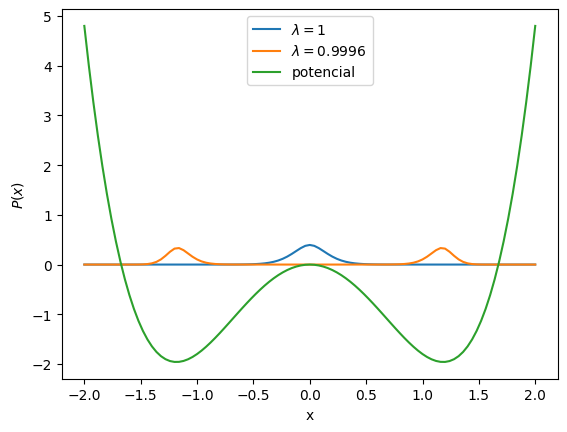

In [ ]:
matrix = transition_matrix(beta=2.4, delta_x=0.04)

# Determina os valores proprios à esquerda e direita
vals,left,right=linalg.eig(matrix,left=True,right=True)
print(np.sort(vals)) #no limite de tempo infito como so tem um valor proprio igual a 1 implica ter uma distribuiçao assintotica bem definida
print(1/np.log(1/0.9999621))

# Ordena os valores proprios de maior para o menor
idx = vals.argsort()[::-1]
vals = vals[idx]
left = left[:,idx]
right = right[:,idx]

#valores de x
x=np.arange(-2,2.04,0.04)

#gráficos
plt.plot(x,abs(right[:,-1]), label = (r'$\lambda = 1$'))
plt.plot(x,abs(right[:,-2]), label = (r'$\lambda = 0.9996$'))
plt.plot(x,energy(x,2.4), label = 'potencial')
plt.xlabel('x')
plt.ylabel('$P(x)$')
plt.legend();

## Pergunta 2

**Correlações:** Para $\beta=2$ o valor médio da posição é nulo.
Sabemos que para um determinado tempo, a distribuição de probabilidade
deixa de depender do tempo e torna-se a distribuição assimptótica
(igual para todos os tempos seguintes). Se construirmos uma amostra
de $T$ valores a partir da sequência visitada pelo passeio aleatório
para tempos superiores ao tempo de equilíbrio ($\tau$), a distribuição
de probabilidade de cada um dos valores é igual à distribuição assimptótica.
Logo o valor médio desta amostra tenderá para o valor exacto (zero),

\begin{equation}
\lim_{T\to+\infty}\frac{1}{T}\sum_{t=0}^{T-1}x(\tau+t)=0.
\end{equation}

O teorema do limite central diz-nos que o erro da medida com $T$
medições deverá ser da ordem de
\begin{equation}
Erro(T)=\frac{\sigma}{\sqrt{T}}
\end{equation}

onde $\sigma$ é o desvio padrão de uma única medição.

1) Estime o valor do erro do valor médio ($\langle x\rangle=0$) obtido $T$ medições consecutivas através de
    \begin{align*}
    \overline{x}_{T}(k) & =\frac{1}{T}\sum_{t=0}^{T-1}x_{k}(\tau+t)\\
    Erro(T) & =\frac{1}{M}\sum_{k=0}^{M-1}(\overline{x}_{T}(k)-\left\langle x\right\rangle )^{2}
    \end{align*}
onde $\overline{x}_{T}(k)$ é o estimador do valor médio obtido na simulação $k$ medindo $T$ valores de posição consecutivos a partir de $t>\tau$ onde $\tau$ é um tempo maior do que o necessário para atingir o equilíbrio. O erro é o valor médio do desvio de cada estimador em relação ao valor exacto em $M$ simulações independentes.

Como seria de esperar o erro diminui ao longo do tempo. No entanto, apenas se verifica quando o T é suficientement grande.

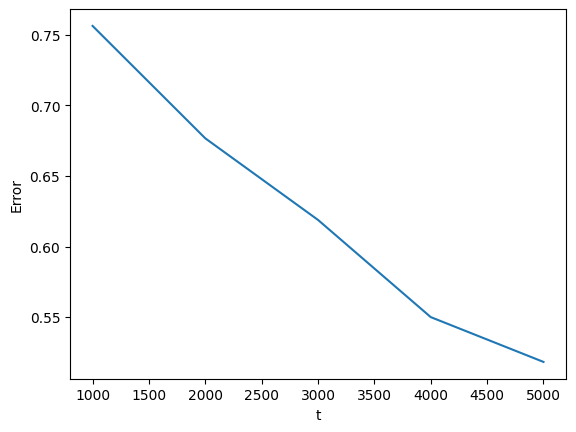

In [ ]:
M=1000

# Estima o erro
def estimate_error(T, M):
  # Inicializa da media com zeros
  means = np.zeros(M)

  # Itera M passeio aleatorio e determinar a media
  for i in range(M):
    dados = random_walk_special(2 ,0 ,T)
    means[i] = np.mean(dados[500:])
  return means

# Tempos a testar e inicialização de array de resultados com zeros
Ts = np.array([1000,2000,3000,4000,5000])
results = np.zeros(len(Ts))

# Determina fi dos resultados devidamente normalizados
for i in range(len(Ts)):
  results[i] = np.sum(estimate_error(Ts[i], M)**2)/M

# Grafico
plt.xlabel('t')
plt.ylabel('Error')
plt.plot(Ts,results);

2. Note que pode estimar o desvio padrão de uma medida calculando o valor
médio
\begin{equation}
\sigma\approx\sqrt{\frac{1}{M}\sum_{k=0}^{M-1}x_{k}^{2}(\tau)}
\end{equation}
a dispersão do ponto inicial. Será que a lei eq: \ref{eq:erro} é
verificada? Represente como função de $T$ a sua estimativa do erro
($T=1,2,4,16,64,256,1024$). Comente o resultado.

Neste caso para T=1,2,4,16,64,256,1024 o erro sobe ao longo do tempo, apenas voltando a descer quando T é muito grande.

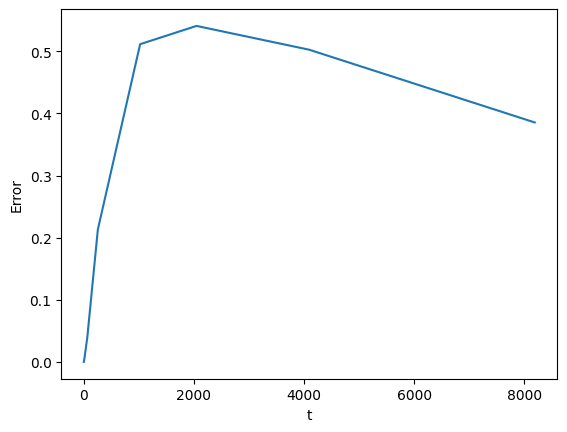

In [ ]:
M=1000
def estimate_error(T, M):
  means = np.zeros(M)
  for i in range(M):
    dados = random_walk_special(2 ,0 ,T)
    means[i] = np.mean(dados[:])
  return means

Ts = np.array([1,2,4,16,64,256,1024,2048,4096,8192])
results = np.zeros(len(Ts))
for i in range(len(Ts)):
  results[i] = np.sum(estimate_error(Ts[i], M)**2)/M

plt.plot(Ts,results)
plt.xlabel('t')
plt.ylabel('Error');

### Bom Trabalho